In [1]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = '/content/drive/MyDrive/Master_thesis/Datasets/UK_data/output1.csv'

Mounted at /content/drive


In [2]:
UK_data = read_csv(path, header=0, parse_dates=[0], index_col=3, squeeze=True, nrows = 100000) # the third column, utc time, is an index column 

UK_data.head()

,Location ID,Measurement Description,Parameter Type and Units,Parameter,Tile_Num,Tile_SequenceNum
Date and Time of capture,,,,,,
09/01/2013 00:01:48,25269,solar power,Average power [kW],-0.002,1,1
09/01/2013 00:02:48,25269,solar power,Average power [kW],-0.002,1,2
09/01/2013 00:03:48,25269,solar power,Average power [kW],-0.002,1,3
09/01/2013 00:04:48,25269,solar power,Average power [kW],-0.002,1,4
09/01/2013 00:05:48,25269,solar power,Average power [kW],-0.002,1,5


In [ ]:
UK_data.groupby('Parameter Type and Units').count()

#Only "Avearge Power" in the 'Parameter Type and Units' column --> drop the column

,Location ID,Measurement Description,Parameter,Tile_Num,Tile_SequenceNum
Parameter Type and Units,,,,,
Average power [kW],1000000,1000000,1000000,1000000,1000000


# Data exploration

In [ ]:
UK_data.groupby(["Measurement Description", "Location ID"]).mean()

#remove rows of "whole home power import" (keep solar power) from "Description" column. 
#Because if the mean of "Parameter" we can see that for location of 25269, solar power and whole home.. are overlapping

UK_data=UK_data[UK_data['Measurement Description'] == "solar power"]

UK_data.head()

,Location ID,Measurement Description,Parameter Type and Units,Parameter,Tile_Num,Tile_SequenceNum
Date and Time of capture,,,,,,
09/01/2013 00:01:48,25269,solar power,Average power [kW],-0.002,1,1
09/01/2013 00:02:48,25269,solar power,Average power [kW],-0.002,1,2
09/01/2013 00:03:48,25269,solar power,Average power [kW],-0.002,1,3
09/01/2013 00:04:48,25269,solar power,Average power [kW],-0.002,1,4
09/01/2013 00:05:48,25269,solar power,Average power [kW],-0.002,1,5


In [ ]:
UK_data.head()

UK_data.info()

UK_data.index

UK_data.columns

UK_data.sort_index() #Index: 713497 entries, 09/01/2013 00:01:48 to 17/05/2013 18:57:29

In [ ]:
#UK_data.groupby('Location ID').count()  #total unique IDs in all 5 output files = 51 

#UK_data.groupby('Tile_SequenceNum').count() #is equal to total number of rows

#UK_data.groupby('Tile_Num').count() # "1" for each row 

#these are useless columsn. Drop them

#run only once
#UK_data= UK_data.drop(columns = ['Tile_SequenceNum', 'Tile_Num', 'Measurement Description','Parameter Type and Units'], axis=1)

UK_data.head()


,Location ID,Parameter
Date and Time of capture,,
09/01/2013 00:01:48,25269,-0.002
09/01/2013 00:02:48,25269,-0.002
09/01/2013 00:03:48,25269,-0.002
09/01/2013 00:04:48,25269,-0.002
09/01/2013 00:05:48,25269,-0.002


# Data Transformation

In [ ]:
UK_data.index = pd.to_datetime(UK_data.index)  # converting index (utc_timestamp) to datetime format of pandas

#UK_data.index

In [ ]:
# UK_data.head()
print("Lenght of the dataset including all the locations have with overlapping date values: ", len(UK_data))
print("Total unique time values: ", len(np.unique(UK_data.index)))
print('overlapping date range between location 25035 and 25269: ', len(UK_data) - len(np.unique(UK_data.index)))

Lenght of the dataset including all the locations have with overlapping date values:  713497
Total unique time values:  712885
overlapping date range between location 25035 and 25269:  612


In [ ]:
UK_data2 = UK_data.pivot(columns = 'Location ID', values = "Parameter")

# #UK_data2.columns
# UK_data2.describe()
UK_data2.info()
#UK_data2.head()
UK_data2.tail(100)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 712885 entries, 2012-01-06 18:59:30 to 2014-12-03 23:59:16
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   25035   426809 non-null  float64
 1   25269   286688 non-null  float64
dtypes: float64(2)
memory usage: 16.3 MB


Location ID,25035,25269
Date and Time of capture,,
2014-12-03 22:20:16,NaN,-0.002
2014-12-03 22:21:16,NaN,-0.002
2014-12-03 22:22:16,NaN,-0.002
2014-12-03 22:23:16,NaN,-0.002
2014-12-03 22:24:16,NaN,-0.002
...,...,...
2014-12-03 23:55:16,NaN,-0.002
2014-12-03 23:56:16,NaN,-0.002
2014-12-03 23:57:16,NaN,-0.002


In [ ]:
#to check why there is so little overlapping. The only overlapping range between these locations are only at the last months of 2013 (Output1 file)

UK_data3 = UK_data2.loc['2013-01-01 22:20:16': '2013-12-31 22:20:16']
UK_data3.tail()

UK_data3['month'] = UK_data4.index.month

# plt.plot(UK_data3['month'], UK_data3[['25269','25035']])
# plt.legend([ '25269','25035'])
# UK_data3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
UK_data3=UK_data2.resample('H').sum()

UK_data3.info()
UK_data3.head(100)
UK_data3.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25494 entries, 2012-01-06 18:00:00 to 2014-12-03 23:00:00
Freq: H
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   25035   25494 non-null  float64
 1   25269   25494 non-null  float64
dtypes: float64(2)
memory usage: 597.5 KB


Location ID,25035,25269
count,25494.000000,25494.000000
mean,3.717807,1.085914
std,16.523864,5.936210
min,-0.669000,-0.965000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,205.670000,68.714000


In [ ]:
import matplotlib.pyplot as plt

UK_data3["Hour"] = UK_data3.index.hour
UK_data3.head(10)
# UK_data3['25035'].groupby(UK_data3["Hour"]).mean().plot(kind="bar", title = "25035")
# plt.show()

#UK_data.head()

Location ID,25035,25269,Hour
Date and Time of capture,,,
2012-01-06 18:00:00,0.000,0.0,18
2012-01-06 19:00:00,0.000,0.0,19
2012-01-06 20:00:00,0.000,0.0,20
2012-01-06 21:00:00,0.000,0.0,21
2012-01-06 22:00:00,0.000,0.0,22
2012-01-06 23:00:00,0.000,0.0,23
2012-01-07 00:00:00,-0.216,0.0,0
2012-01-07 01:00:00,-0.236,0.0,1
2012-01-07 02:00:00,-0.232,0.0,2


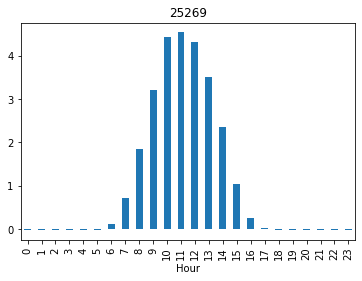

In [ ]:
UK_data3['25269'].groupby(UK_data3["Hour"]).mean().plot(kind="bar", title = "25269")
plt.show()

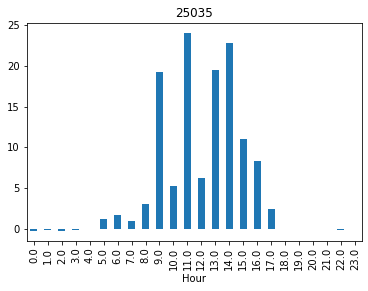

In [ ]:
UK_data3["Hour"] = UK_data3.index.hour
UK_data2.head()
UK_data3['25035'].groupby(UK_data2["Hour"]).mean().plot(kind="bar", title = "25035")
plt.show()


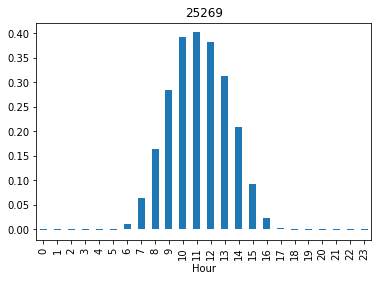

Location ID,25035,25269,Hour
Date and Time of capture,,,
2012-01-06 18:59:30,0.000,NaN,18
2012-01-06 19:03:31,0.000,NaN,19
2012-01-06 19:06:32,0.000,NaN,19
2012-01-06 19:17:31,0.000,NaN,19
2012-01-07 00:00:01,-0.004,NaN,0


In [ ]:
UK_data2['25269'].groupby(UK_data2["Hour"]).mean().plot(kind="bar", title = "25269")
plt.show()

UK_data2.head()